In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
atheletes_csv = pd.read_csv('athlete_events.csv')
regions_csv = pd.read_csv('noc_regions.csv')

In [147]:
athletes_columns_to_be_cleaned = ['Age']
atheletes_csv = atheletes_csv.dropna(axis=0, subset=athletes_columns_to_be_cleaned)

regions_columns_to_be_cleaned = ['Continent']
regions_csv = regions_csv.dropna(axis=0, subset=regions_columns_to_be_cleaned)

# We cleaned the data so every country is part of the 5 continents that participate in the olympic games
# Europe, Asia, Africa, America, Oceania
regions_order = ['Europe', 'Asia', 'Africa', 'America', 'Oceania']

# Merge the data
merged_data = pd.merge(atheletes_csv, regions_csv, on='NOC')

In [148]:
# Utility variables
medal_data = merged_data.dropna(axis=0, subset=['Medal'])
medal_count = medal_data['Continent'].value_counts()
medal_count = medal_count.reindex(regions_order)

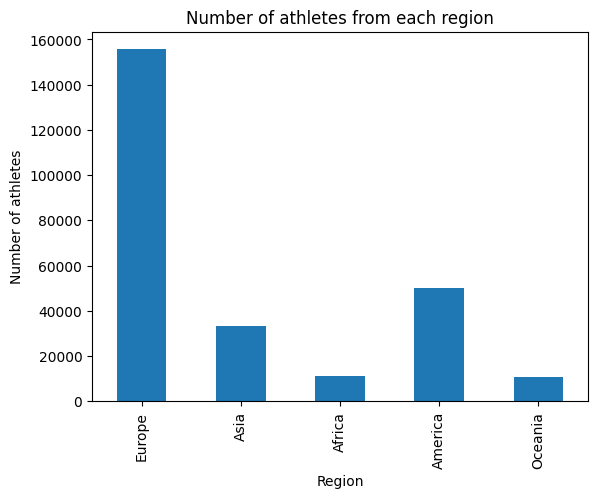

In [149]:
# 2.1 Athlete Representation by Region: 
# Identifying the regions with the highest athlete representation.

medal_data = merged_data.dropna(axis=0, subset=['Medal'])
medal_count = medal_data['Continent'].value_counts()
medal_count = medal_count.reindex(regions_order)

athletes_count = merged_data['Continent'].value_counts()
athletes_count = athletes_count.reindex(regions_order)

athletes_count.plot(kind='bar')
plt.title('Number of athletes from each region')
plt.xlabel('Region')
plt.ylabel('Number of athletes')
plt.show()

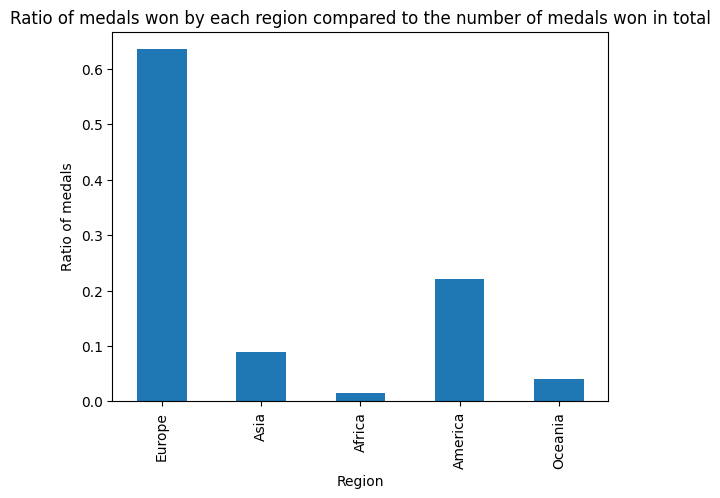

In [150]:
# 2.2 Regional Medal Count: 
# Analyzing which regions win the most medals across all sports.
total_medals = medal_count.sum()
medal_ratio = medal_count / total_medals
medal_ratio = medal_ratio.reindex(regions_order)

medal_ratio.plot(kind='bar')
plt.title('Ratio of medals won by each region compared to the number of medals won in total')
plt.xlabel('Region')
plt.ylabel('Ratio of medals')
plt.show()

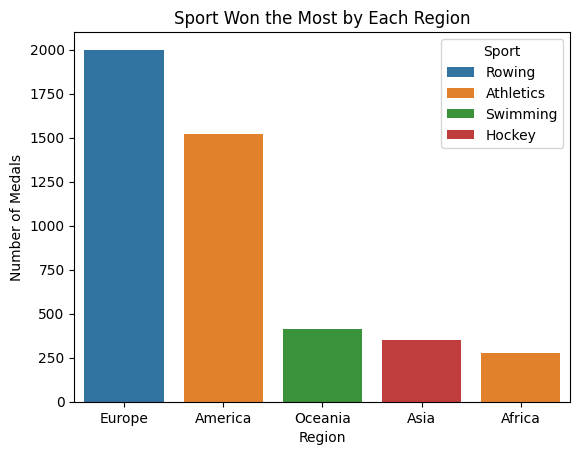

In [151]:
# 2.3 Sports Dominated by Specific Regions: 
# Investigating which sports are most frequently won by athletes from particular regions.

medals_won_by_each_region_in_each_sport = merged_data.dropna(axis=0, subset=['Medal']).groupby(['Continent', 'Sport'])['Medal'].count().reset_index()
medals_won_by_each_region_in_each_sport = medals_won_by_each_region_in_each_sport.sort_values('Medal', ascending=False).drop_duplicates(subset='Continent', keep='first')
fig, ax = plt.subplots()
sns.barplot(x='Continent', y='Medal', data=medals_won_by_each_region_in_each_sport, hue='Sport', ax=ax)
ax.set_title('Sport Won the Most by Each Region')
ax.set_xlabel('Region')
ax.set_ylabel('Number of Medals')
plt.show()



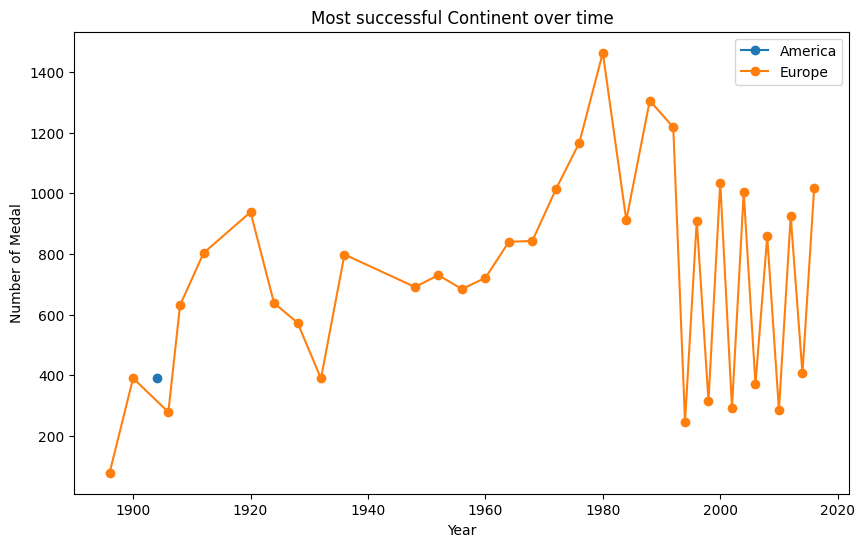

In [152]:
# 2.4 Successful Sports for Each Region and Trends Over Time:
# Exploring the most successful sports for each region and how these trends have evolved.

cleaned_data = merged_data.dropna(axis=0, subset=['Medal'])
grouped = cleaned_data.groupby(['Continent', 'Year']).size().reset_index(name='Medal')

most_successful_Continents = grouped.loc[grouped.groupby('Year')['Medal'].idxmax()]

plt.figure(figsize=(10, 6))
for Continent, data in most_successful_Continents.groupby('Continent'):
    plt.plot(data['Year'], data['Medal'], marker='o', label=Continent)

plt.title('Most successful Continent over time')
plt.xlabel('Year')
plt.ylabel('Number of Medal')
plt.legend()
plt.show()



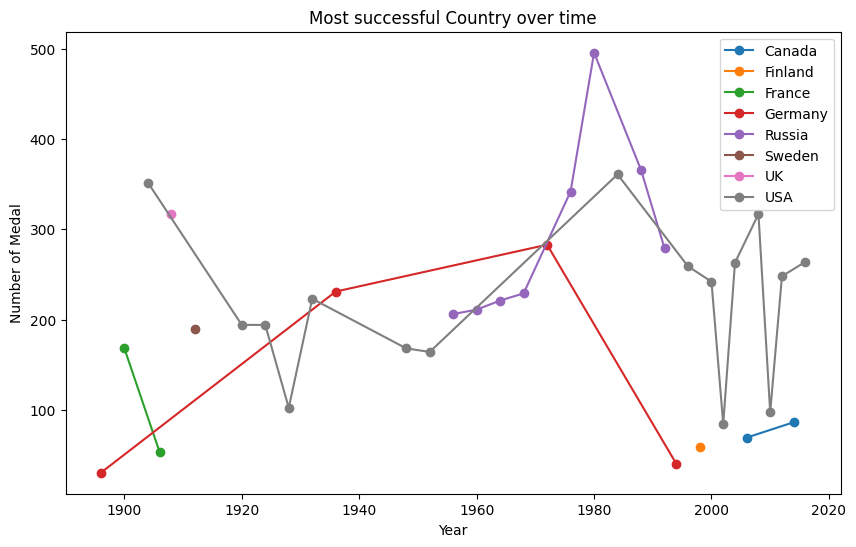

In [153]:
# 2.5 Historical Success of Countries in the Olympics:
# Examining which countries have been most successful throughout Olympic history.

cleaned_data = merged_data.dropna(axis=0, subset=['Medal'])
grouped_data = cleaned_data.groupby(['Region', 'Year']).size().reset_index(name='Medal')

most_successful_countries = grouped_data.loc[grouped_data.groupby('Year')['Medal'].idxmax()]

plt.figure(figsize=(10, 6))

for region, data in most_successful_countries.groupby('Region'):
    plt.plot(data['Year'], data['Medal'], marker='o', label=region)  # Added marker='o

plt.title('Most successful Country over time')
plt.xlabel('Year')
plt.ylabel('Number of Medal')
plt.legend()
plt.show()
